In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import datetime as dt
import numpy as np

In [2]:
data=pd.read_csv('StatewiseTestingDetails.csv')
data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [3]:
%matplotlib inline
tn=data[data['State']=='Tamil Nadu']
tn["Date"] = pd.to_datetime(tn["Date"]).dt.strftime("%Y%m%d")


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
tn['Date']=tn['Date'].astype(int)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
tn=tn.drop(['State','TotalSamples','Negative'],axis=1)


In [6]:
tn=tn[tn['Date']>20200600]

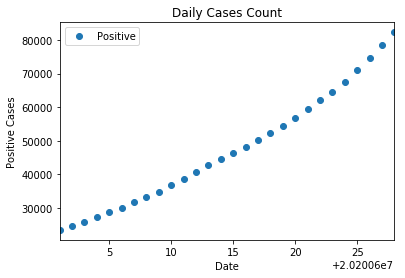

In [7]:
tn.plot(x='Date', y='Positive', style='o')
plt.title('Daily Cases Count')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()

In [8]:
X = tn.iloc[:, :-1].values
y = tn.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = linear_model.LinearRegression().fit(X_train,y_train)

In [11]:
model.intercept_

-42831089748.30319

In [12]:
y_pred=model.predict(X_test)

In [13]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,25872.0,23352.592499
1,64603.0,65758.369301
2,46504.0,48796.058578
3,52334.0,55156.925102
4,30152.0,29713.459023
5,40698.0,42435.192062


In [15]:
model.predict([[20200810]])

array([462252.38237])